# Zorgkaarten

In [1]:
# import modules and version info
import sys
print(f'python     {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')

import numpy as np
print(f'numpy      {np.__version__}')

import pandas as pd
print(f'pandas     {pd.__version__}')

import geopandas as gpd
print(f'geopandas  {gpd.__version__}')

import matplotlib.pyplot as plt
print(f'matplotlib {sys.modules["matplotlib"].__version__}')

from shapely.geometry import Point
print(f'shapely    {sys.modules["shapely"].__version__}')

import folium # conda install -c conda-forge folium
from folium.plugins import MarkerCluster
print(f'folium     {folium.__version__}')

import ipywidgets
print(f'ipywidgets {ipywidgets.__version__}')

python     3.6.6
numpy      1.15.4
pandas     0.23.4
geopandas  0.4.0
matplotlib 2.2.2
shapely    1.6.4.post2
folium     0.7.0
ipywidgets 7.4.2


## 1. Zorglocaties

### Lees data

In [2]:
# gemeentegrenzen
gg = gpd.read_file('../shapefiles/imergis/2018-Imergis_gemeentegrenzen_kustlijn-shp/2018-Imergis_gemeentegrenzen_kustlijn.shp')

In [3]:
# zorglocaties
locatie = pd.read_csv('../data/zorglocaties.csv', usecols=['postcode', 'sector']).dropna()
locatie['postcode'] = locatie.postcode.apply(lambda x: x.replace(' ', '').upper())
locatie.sample(n=7)

,postcode,sector
31568,2211HZ,Huisartsenpraktijk
13150,2613XN,Huisartsenpraktijk
27197,3571WG,Psychologiepraktijk en psychotherapiepraktijk
13799,5262TN,Thuiszorg
19988,2333ZA,Apotheek
46331,4704RK,Thuiszorg
26218,5361MS,Diëtistenpraktijk


In [4]:
# postcode
pc6 = pd.read_csv('../shapefiles/bag/Postcodes-plaatsen-overheid-nuts-2018/woonplaatsen_pc6.csv', 
                  usecols=['pc6', 'rdx', 'rdy'], sep=';')
pc6.columns = ['postcode', 'rdx', 'rdy']
pc6.sample(n=7)

,postcode,rdx,rdy
88457,4567CG,64194.000000,365075.375000
365590,3203VM,82821.768333,428569.112810
396051,5556VN,157741.101586,366623.735000
211064,6014DC,186559.896000,354306.345143
233378,2353MG,96332.256154,464816.769615
140186,4871BB,103651.097143,399126.705714
83705,3981WD,142067.250000,453102.375000


### Samenvoegen data

In [5]:
# merge data
df = pd.merge(locatie, pc6, how='left', on='postcode').dropna()
df.sample(n=7)

,postcode,sector,rdx,rdy
18368,7327AB,GGZ,196132.887083,466992.460250
27740,5465RV,Fysiotherapiepraktijk,166374.263962,400445.817538
25291,9591BW,Woonvoorziening voor verstandelijk gehandicapten,265591.861037,562385.112000
35769,3191KE,Huisartsenpraktijk,84829.130400,431064.257600
4137,7891AV,Fysiotherapiepraktijk,263007.117167,527866.699167
31193,6538DG,Huidtherapiepraktijk,184188.407353,424602.147235
1707,5151HK,Verpleeghuis en verzorgingshuis,137244.335883,411252.197574


### Top 20

In [6]:
# aantal zorglocaties per sector (top 20)
df.sector.value_counts()[:20]

Fysiotherapiepraktijk                               7670
Huisartsenpraktijk                                  4691
Tandartsenpraktijk                                  4638
Thuiszorg                                           3491
Diëtistenpraktijk                                   2572
Psychologiepraktijk en psychotherapiepraktijk       2414
Verpleeghuis en verzorgingshuis                     2170
Apotheek                                            1894
Woonvoorziening voor verstandelijk gehandicapten    1893
Logopediepraktijk                                   1893
GGZ                                                 1557
Organisatie                                         1261
Oefentherapiepraktijk                               1241
Podotherapiepraktijk                                1157
Verloskundepraktijk                                  718
Huidtherapiepraktijk                                 656
Mondhygiënistenpraktijk                              601
Arbo- en reïntegratiebedrijf   

### Zorgkaart

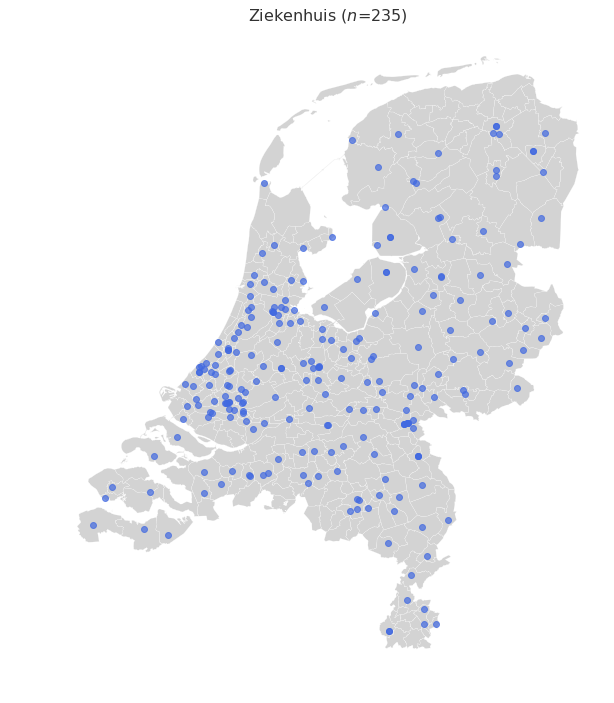

In [7]:
sector = 'Ziekenhuis'
selectie = df[df.sector == sector]
gg.plot(figsize=(10, 12), color='lightgrey', edgecolor='white', linewidth=0.2)
plt.title('{} ($n$={})'.format(sector, selectie.shape[0]), fontsize=16, color='#323232')
plt.scatter(selectie.rdx, selectie.rdy, color='royalblue', alpha=0.7)
plt.axis('off')
plt.show()

### Interactieve zorgkaart

In [8]:
def zorgkaart(sector):
    selectie = df[df.sector == sector]
    gg.plot(figsize=(10, 12), color='lightgrey', edgecolor='white', linewidth=0.2)
    plt.title('{} ($n$={})'.format(sector, selectie.shape[0]), fontsize=16, color='#323232')
    plt.scatter(selectie.rdx, selectie.rdy, color='royalblue', alpha=0.7)
    plt.axis('off')
    return plt.show()

ipywidgets.interact(zorgkaart,
                    sector = ipywidgets.Dropdown(options=np.sort(df.sector.unique()),
                                                 value='Ziekenhuis',
                                                 description='Zorgsector')
                   )

interactive(children=(Dropdown(description='Zorgsector', index=76, options=('Abortuskliniek', 'Apotheek', 'Arb…

<function __main__.zorgkaart(sector)>

## 2. Postcodegebieden

### Lees data

In [9]:
# lees shapefile pc4
shp = '../shapefiles/esri/ESRI_PC4_kustlijn_2017R1-shp/ESRI_PC4_kustlijn_2017R1.shp'
pc4 = gpd.read_file(shp)
pc4.drop(['id', 'objectid', 'aantal_mul', 'shape_leng', 'shape_area'], axis=1, inplace=True)
pc4.sample(n=5)

,pc4,aantal_adr,geometry
2717,7577,4022,"POLYGON ((260319.5069000013 483881.9384999983,..."
3048,7891,5982,"(POLYGON ((261318.2166000009 526764.238499999,..."
2476,6603,2384,"POLYGON ((181820.0940000005 425688.5799999982,..."
1513,6941,2068,(POLYGON ((206280.3420000002 439972.2149999999...
2159,6176,1651,"POLYGON ((187077.4569999985 328859.3399999999,..."


### Bewerkt data

In [10]:
# pc4
df['pc4'] = df.postcode.apply(lambda x: x[:4])
df.drop(['postcode', 'rdx', 'rdy'], axis=1, inplace=True)
df.sample(n=5)

,sector,pc4
39796,Fysiotherapiepraktijk,7041
25396,Dialysecentrum,7772
34222,Logopediepraktijk,4822
32661,GGZ,6709
15123,Huisartsenpraktijk,1073


In [11]:
# aantal zorglocaties per sector per pc4
telling = df.groupby(by=['sector', 'pc4']).size().to_frame().reset_index()
telling.columns = ['sector', 'pc4', 'aantal']
telling.sample(n=5)

,sector,pc4,aantal
8787,Huisartsenpost,7824,1
3329,Diëtistenpraktijk,4424,1
5231,Fysiotherapiepraktijk,2661,8
22314,Thuiszorg,4464,1
21921,Thuiszorg,2564,1


### Zorgkaart

In [12]:
# Fysiotherapie data
sector = 'Fysiotherapiepraktijk'
selectie = telling[telling.sector == sector]
gdf = pd.merge(pc4, selectie,
               how='left',
               on='pc4')[['pc4', 'aantal_adr', 'geometry', 'aantal']].fillna(0)
gdf.sample(n=5)

,pc4,aantal_adr,geometry,aantal
3003,7831,1572,"POLYGON ((263068.3641000018 543691.9974000007,...",0.0
2487,6617,781,"POLYGON ((174364.8220000006 430941.3029999994,...",1.0
3158,8166,1582,"POLYGON ((189415.1730000004 484337.8090000004,...",0.0
2465,6732,1484,"POLYGON ((184237.4880999997 463311.3779999986,...",1.0
519,2082,1744,"POLYGON ((103616.0001000017 493771, 103608.000...",3.0


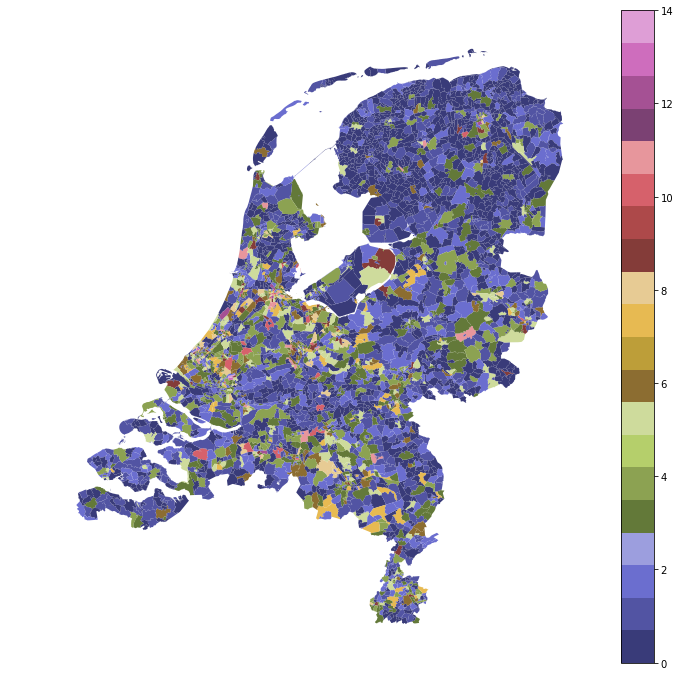

In [13]:
# Fysiotherapie kaart
f, ax = plt.subplots(1, figsize=(12, 12))
ax = gdf.plot(ax=ax, column='aantal', cmap='tab20b', legend=True)
plt.axis('off')
plt.show()

### Interactieve zorgkaart

In [14]:
def zorgkaart(sector, cmap):
    selectie = telling[telling.sector == sector]
    gdf = pd.merge(pc4, selectie, how='left', on='pc4')[['pc4', 'aantal_adr', 'geometry', 'aantal']].fillna(0)
    f, ax = plt.subplots(1, figsize=(12, 12))
    ax = gdf.plot(ax=ax, column='aantal', cmap=cmap, legend=True)
    plt.title(f'{sector}', fontsize=16, color='#323232')
    plt.axis('off')
    return plt.show()

ipywidgets.interact(zorgkaart,
                    cmap = ipywidgets.ToggleButtons(options=['viridis', 'inferno', 'tab20b', 'Blues', 'Blues_r'],
                                                    description='Color Map',
                                                    value='viridis'),
                    sector = ipywidgets.Dropdown(options=np.sort(df.sector.unique()),
                                                 value='Fysiotherapiepraktijk',
                                                 description='Zorgsector'))

interactive(children=(Dropdown(description='Zorgsector', index=25, options=('Abortuskliniek', 'Apotheek', 'Arb…

<function __main__.zorgkaart(sector, cmap)>